In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
data=pd.read_csv(r"C:\Users\Arbaj\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv")
pd.set_option('display.max_columns',50)
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [3]:
print(os.listdir("../"))

['All Users', 'Arbaj', 'Default', 'Default User', 'desktop.ini', 'Public']


In [4]:
data.isnull().sum().any()
#there is no missing/NULL values in dataset.

False

In [5]:
data.shape

(1470, 35)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
data.Attrition.value_counts()
# there is an imbalance problem. In machine learning models, mostly that means overfit problem.

No     1233
Yes     237
Name: Attrition, dtype: int64

In [8]:
cat=[]
num=[]
for i in data.columns:
    if data[i].dtypes=='O':
        cat.append(i)
    else:
        num.append(i)  

In [9]:
cat

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [10]:
for i in cat:
    print(f"{i}={data[i].nunique()}\n",'                  ',data[i].unique(),'\n' )

Attrition=2
                    ['Yes' 'No'] 

BusinessTravel=3
                    ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] 

Department=3
                    ['Sales' 'Research & Development' 'Human Resources'] 

EducationField=6
                    ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'] 

Gender=2
                    ['Female' 'Male'] 

JobRole=9
                    ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources'] 

MaritalStatus=3
                    ['Single' 'Married' 'Divorced'] 

Over18=1
                    ['Y'] 

OverTime=2
                    ['Yes' 'No'] 



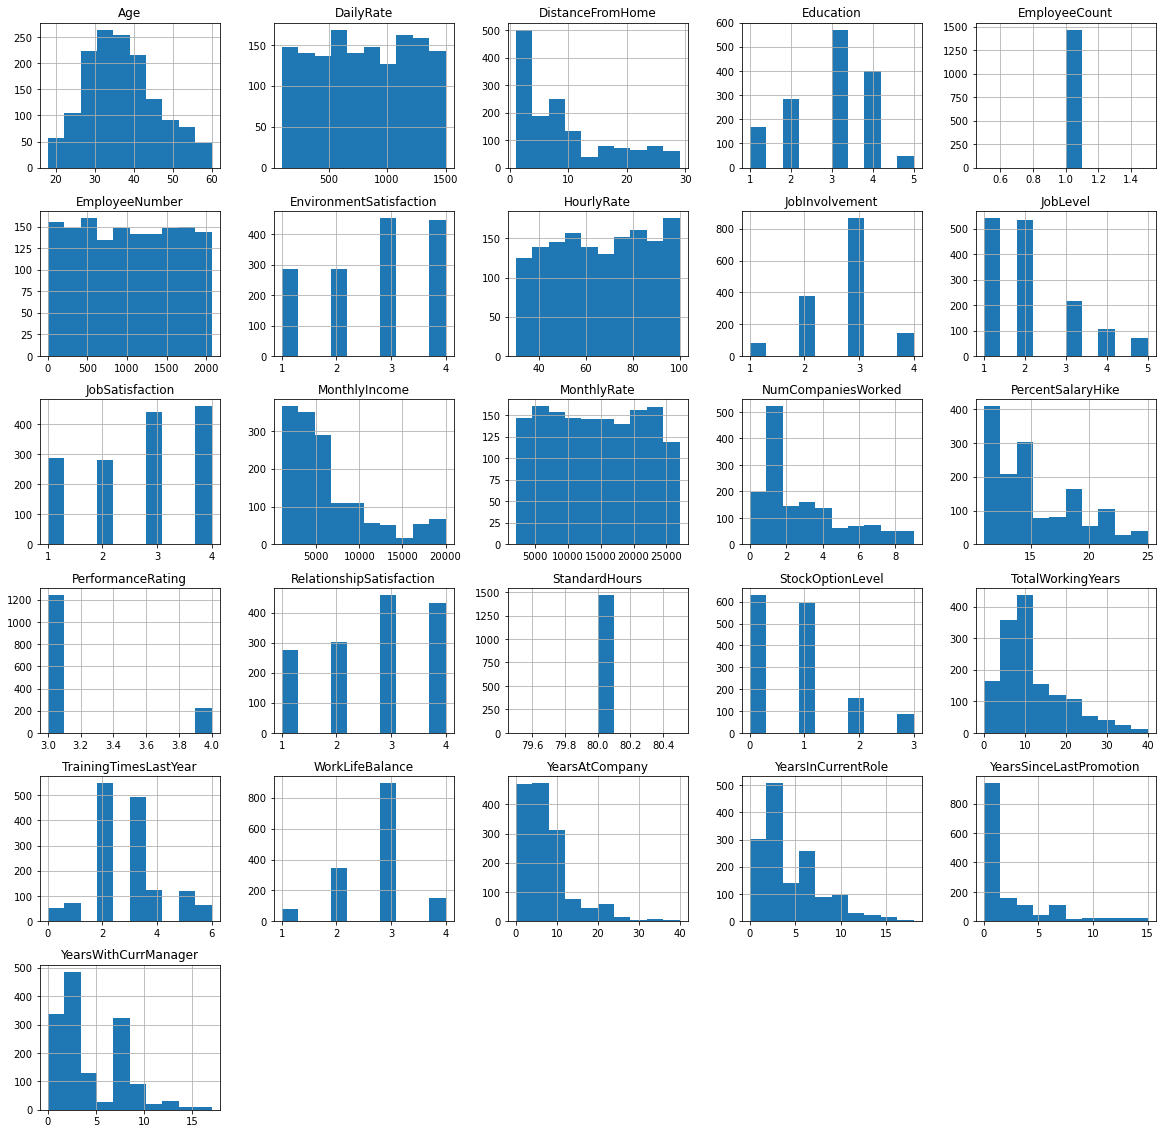

In [11]:
data.hist(figsize=(20,20))
plt.show()

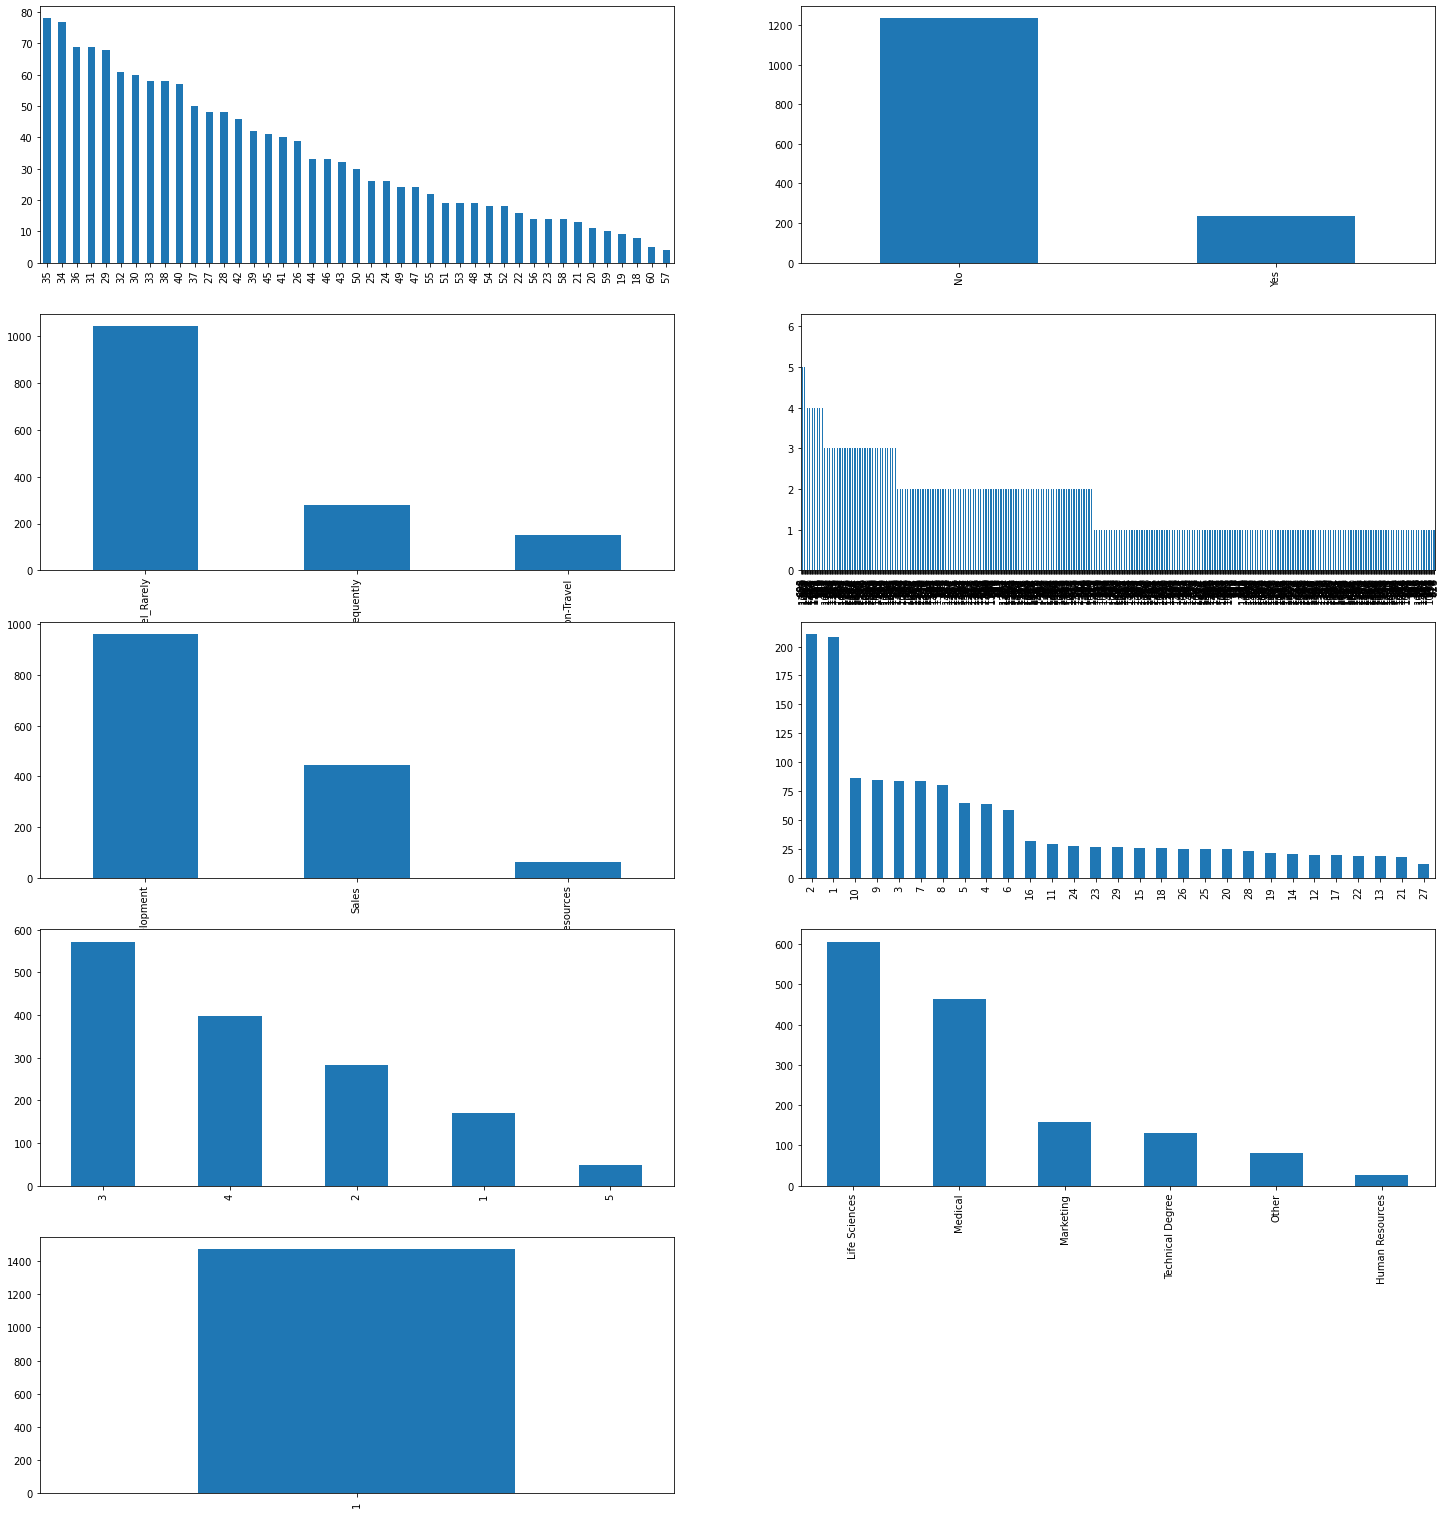

In [12]:
fig=plt.figure(figsize=(25,50))
for i in range (len(cat)):
    fig.add_subplot(9,2,i+1)
    data.iloc[:,i].value_counts().plot(kind='bar')

In [13]:
data1=data.copy()

In [14]:
data1.Attrition=data.Attrition.map({'Yes':1,'No':0})
data1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [15]:
data1.corr()['Attrition'].sort_values()

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
EmployeeNumber             -0.010577
HourlyRate                 -0.006846
PerformanceRating           0.002889
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
DistanceFromHome            0.077924
Attrition                   1.000000
EmployeeCount                    NaN
StandardHours                    NaN
N

In [16]:
def plotting(data,col):
    fig,axes=plt.subplots(1,2,figsize=(30,5))
    sns.boxplot(data[col],ax=axes[0])
    sns.histplot(data[col],kde=True,ax=axes[1])
    plt.show()

                                                          Age


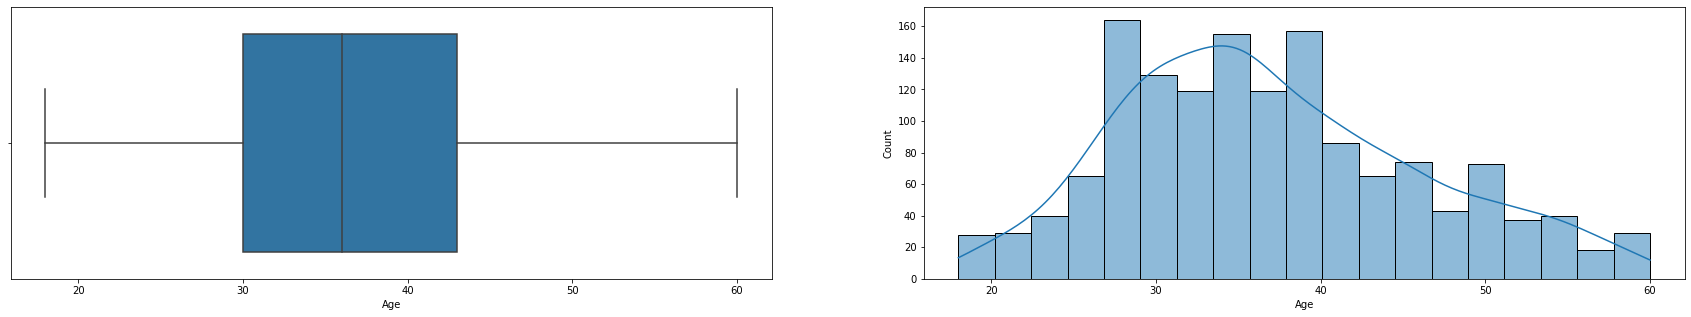


     
     
     
           
                                                          DailyRate


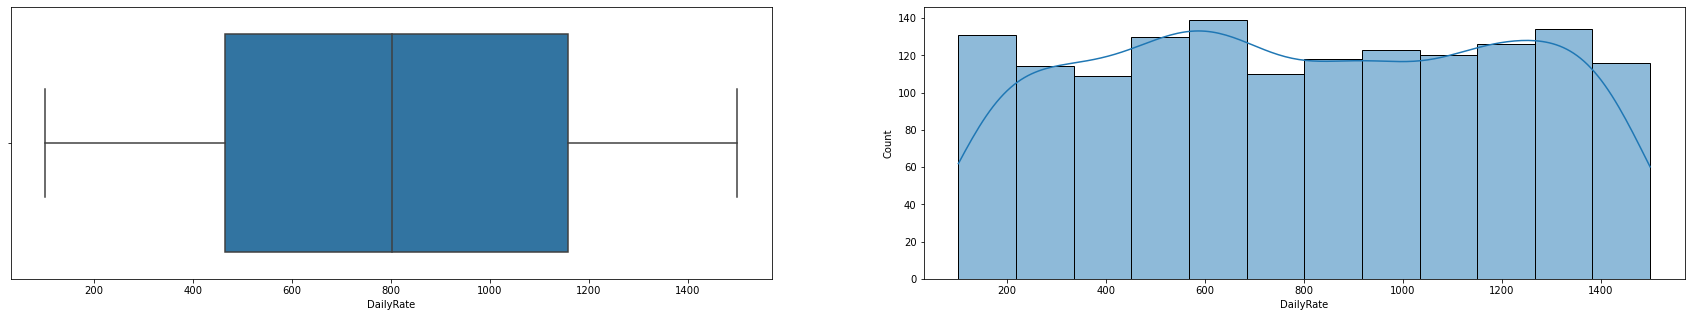


     
     
     
           
                                                          DistanceFromHome


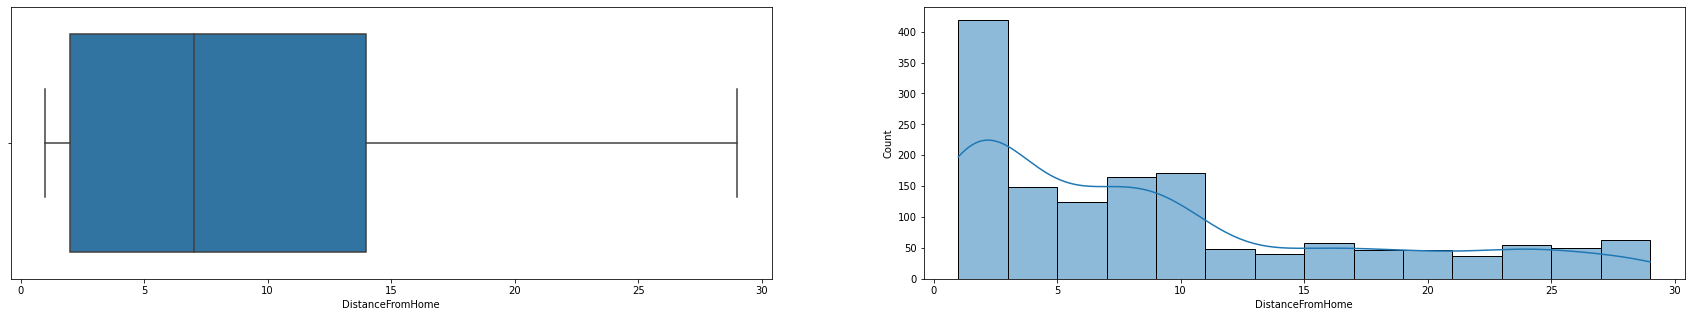


     
     
     
           
                                                          Education


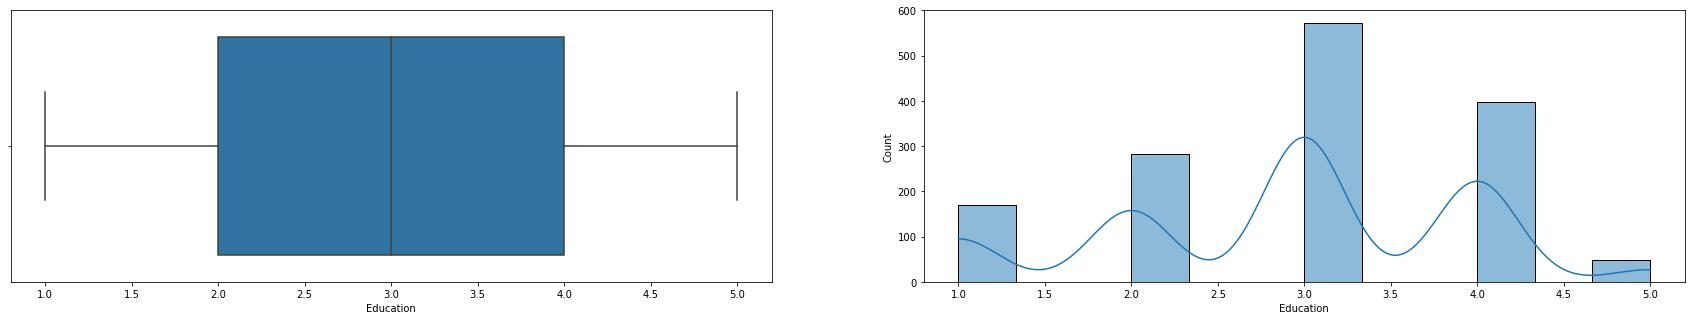


     
     
     
           
                                                          EmployeeCount


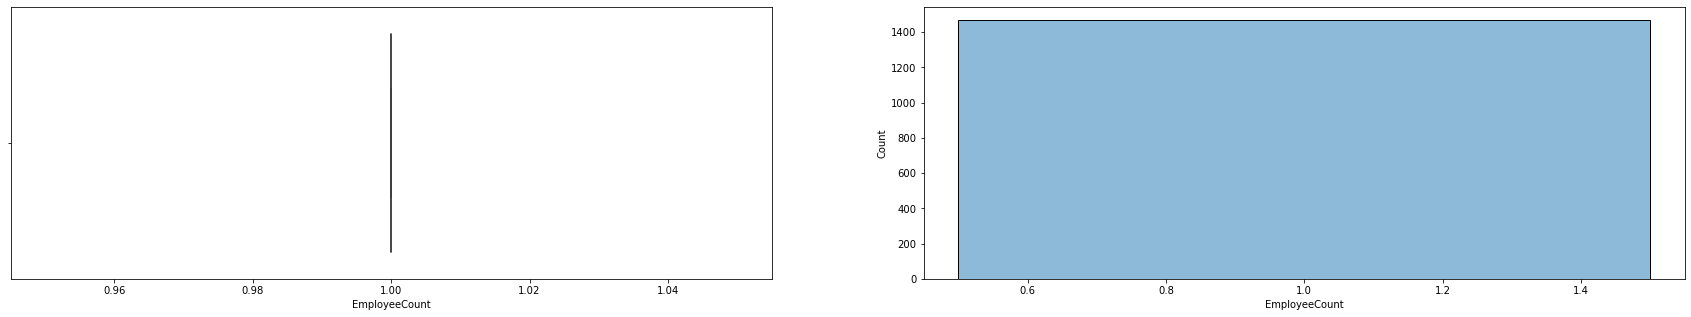


     
     
     
           
                                                          EmployeeNumber


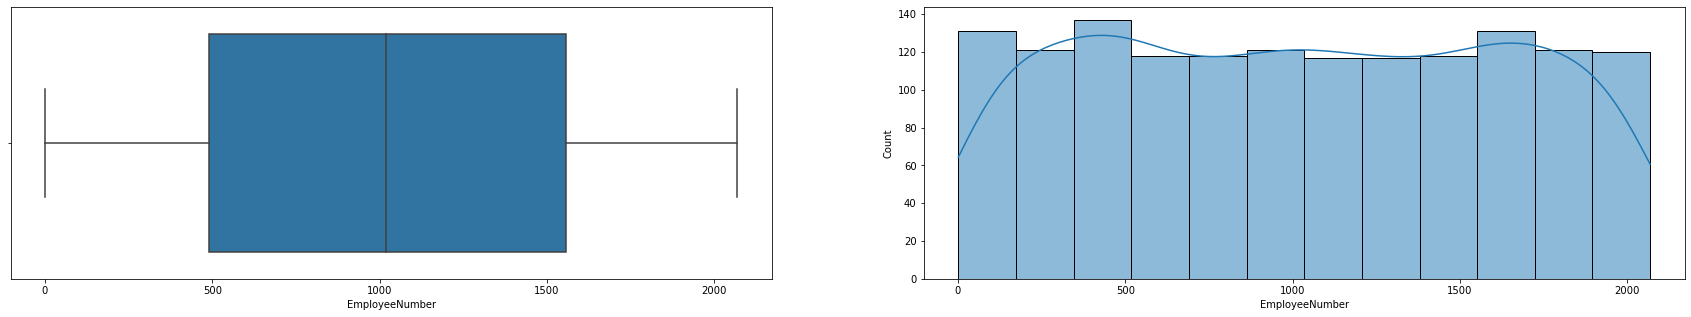


     
     
     
           
                                                          EnvironmentSatisfaction


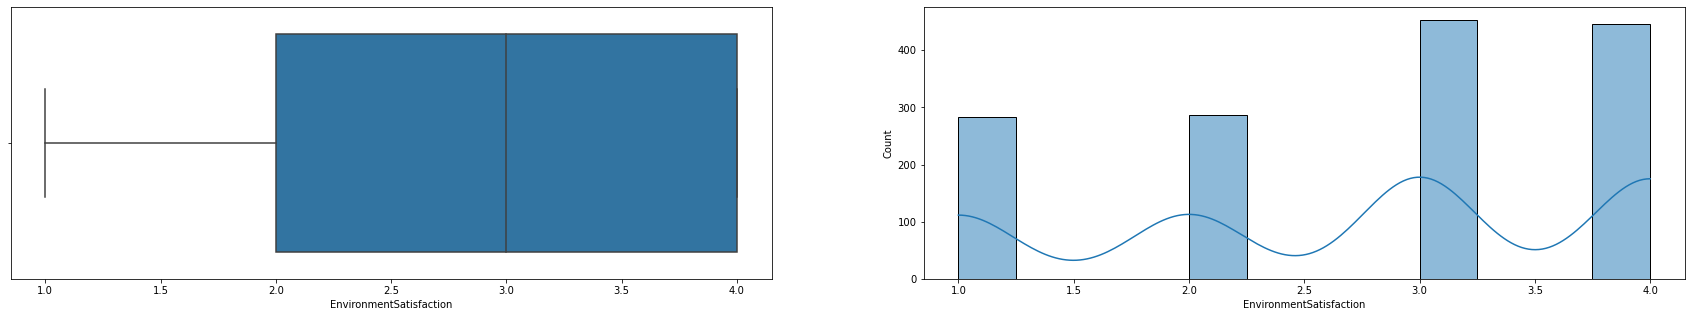


     
     
     
           
                                                          HourlyRate


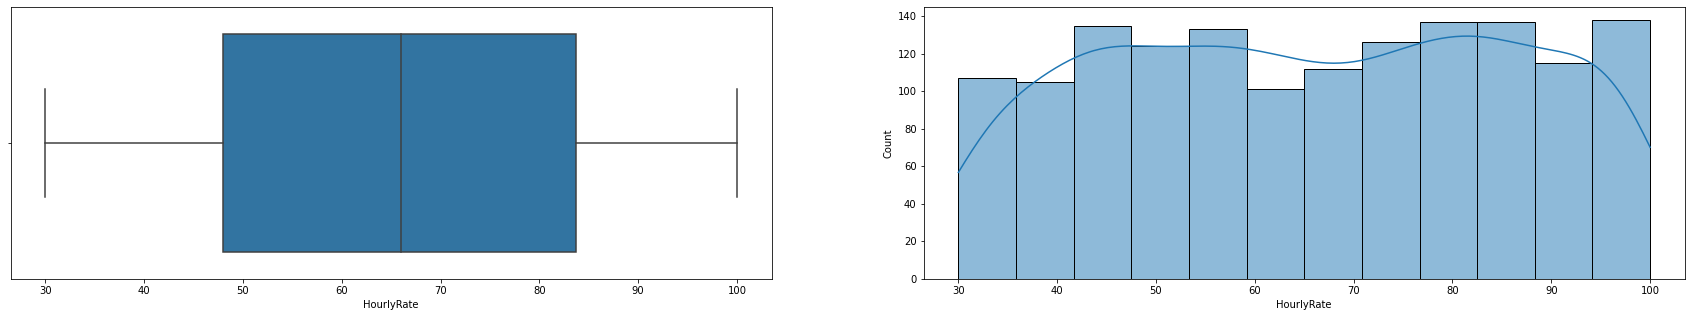


     
     
     
           
                                                          JobInvolvement


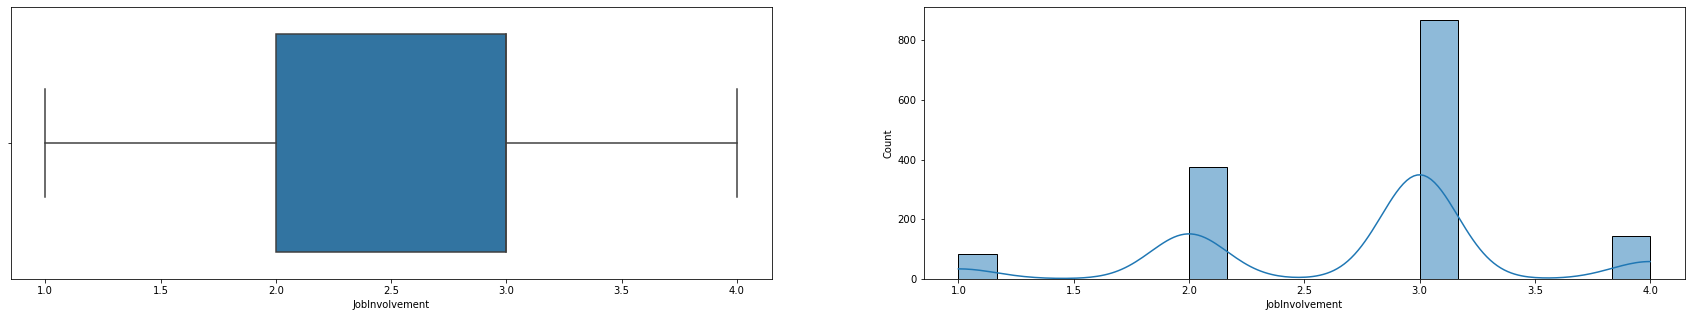


     
     
     
           
                                                          JobLevel


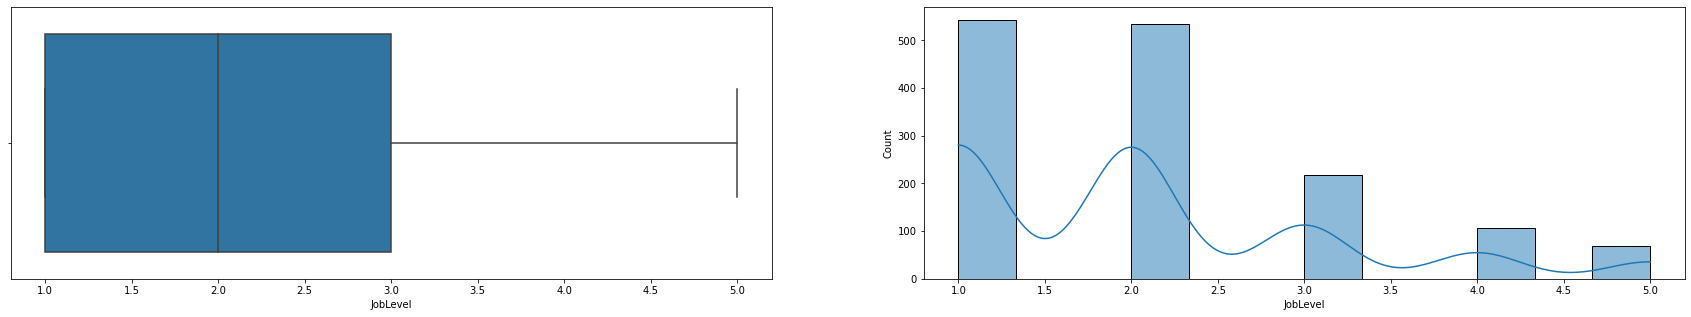


     
     
     
           
                                                          JobSatisfaction


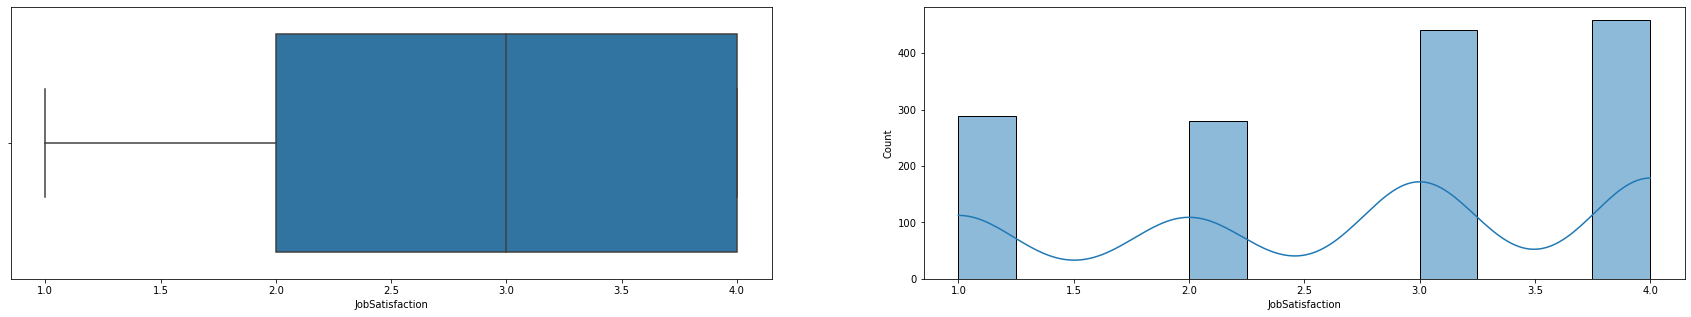


     
     
     
           
                                                          MonthlyIncome


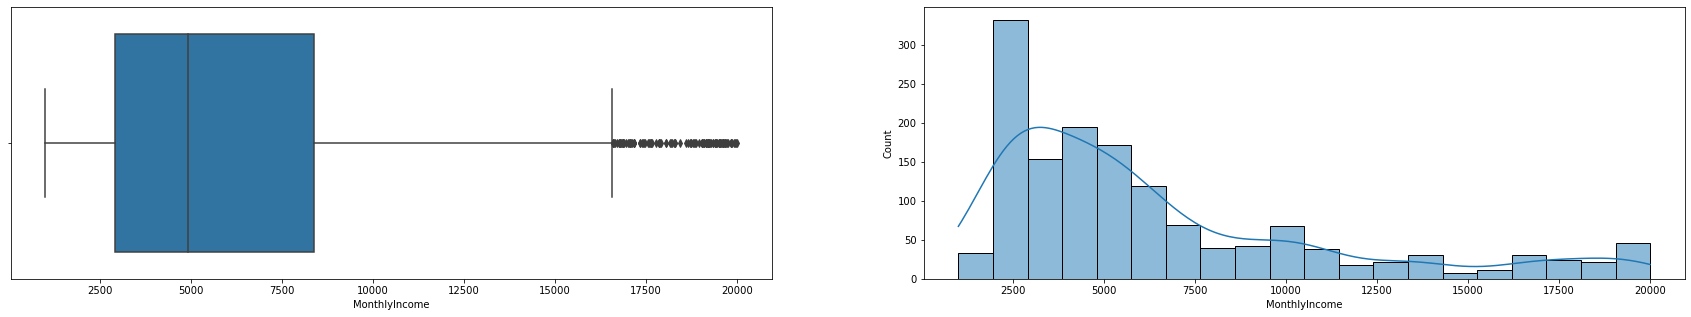


     
     
     
           
                                                          MonthlyRate


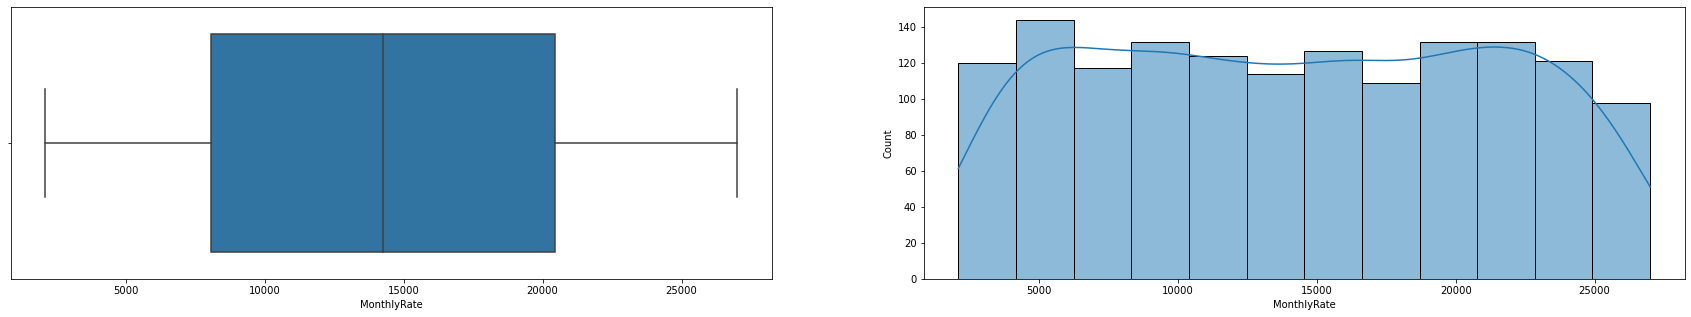


     
     
     
           
                                                          NumCompaniesWorked


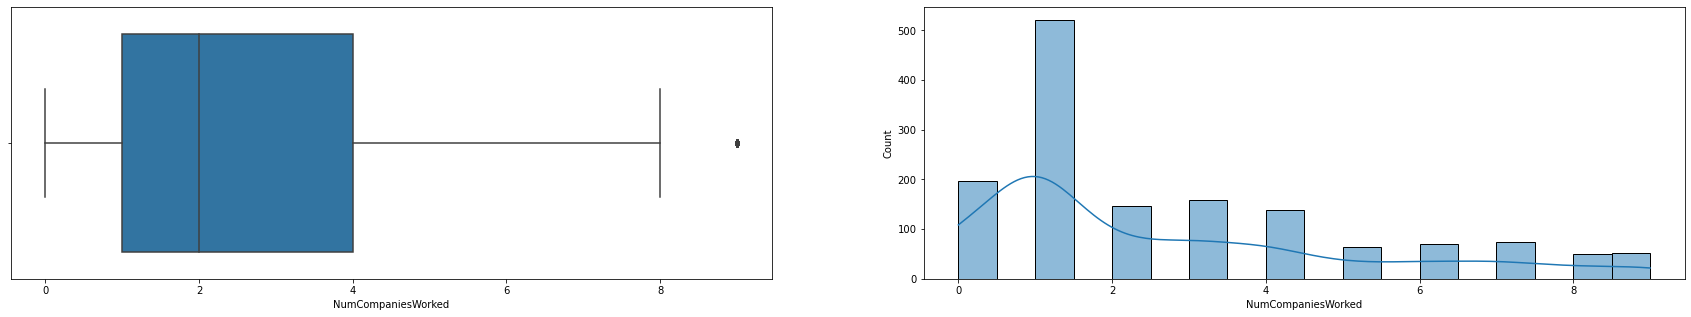


     
     
     
           
                                                          PercentSalaryHike


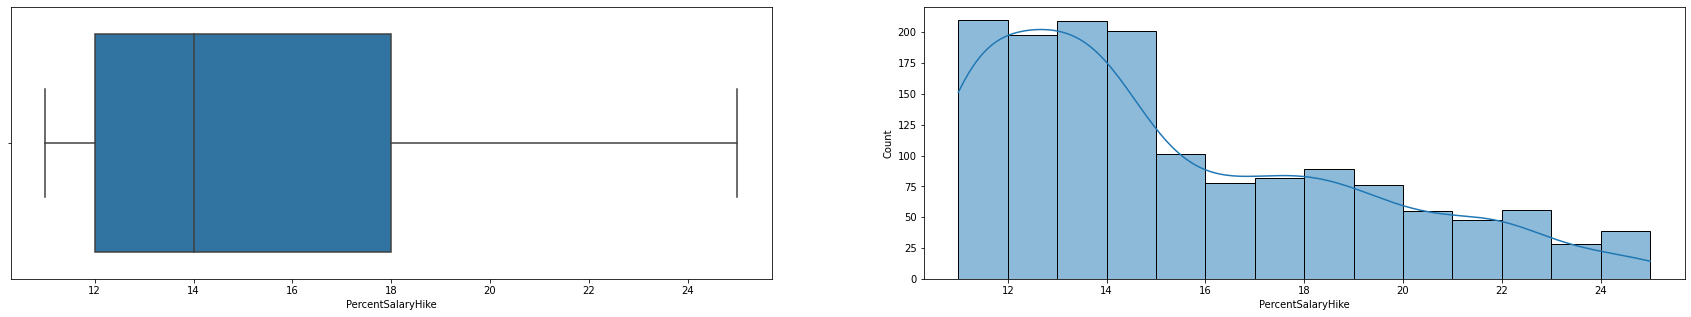


     
     
     
           
                                                          PerformanceRating


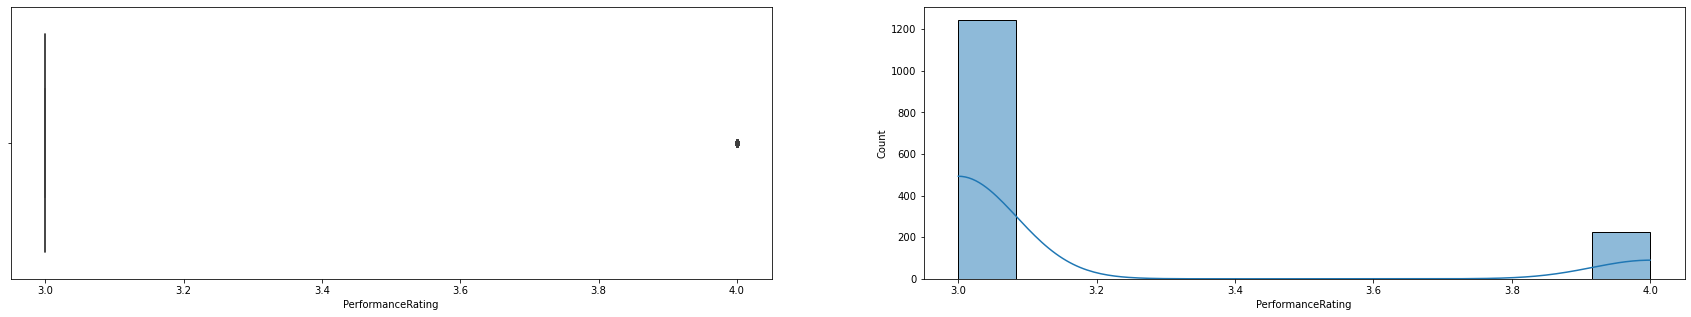


     
     
     
           
                                                          RelationshipSatisfaction


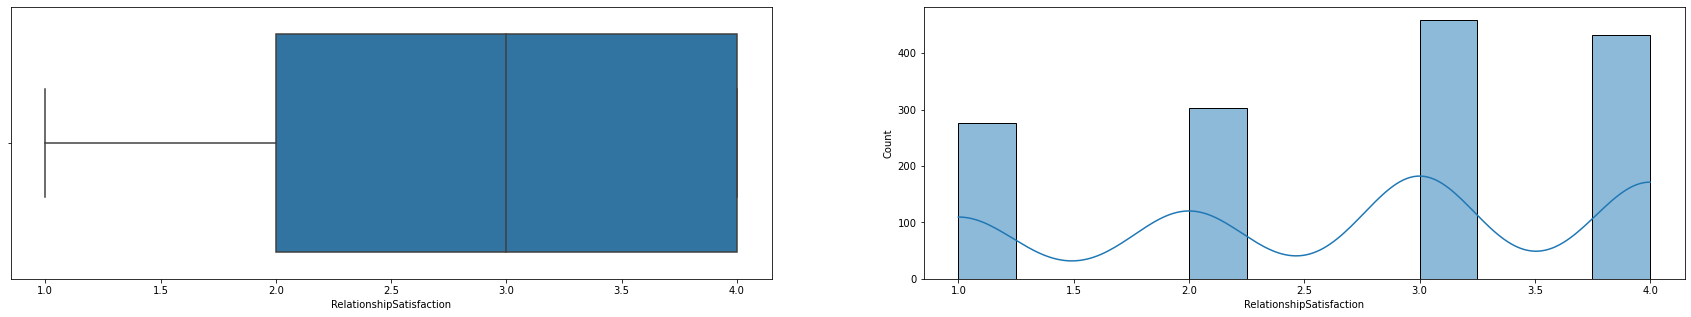


     
     
     
           
                                                          StandardHours


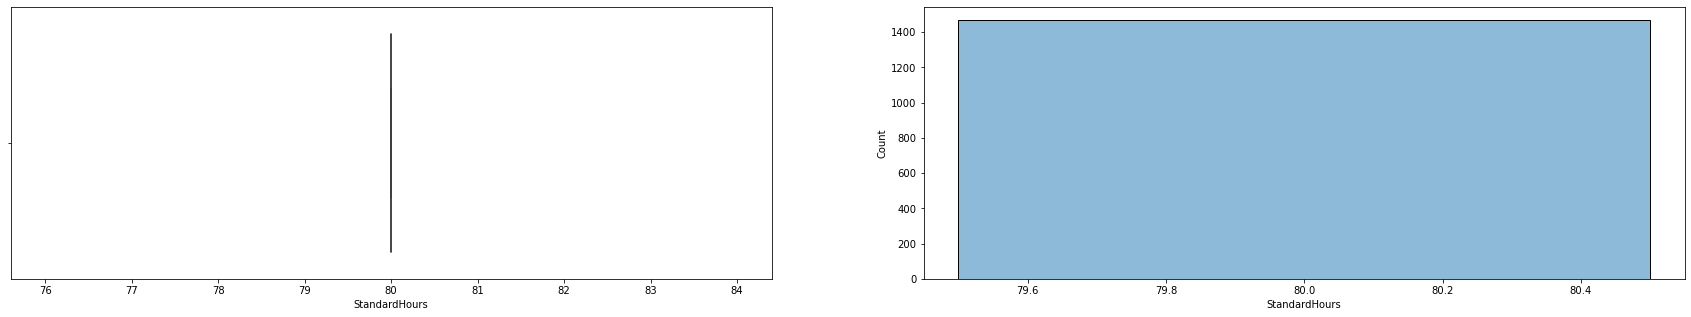


     
     
     
           
                                                          StockOptionLevel


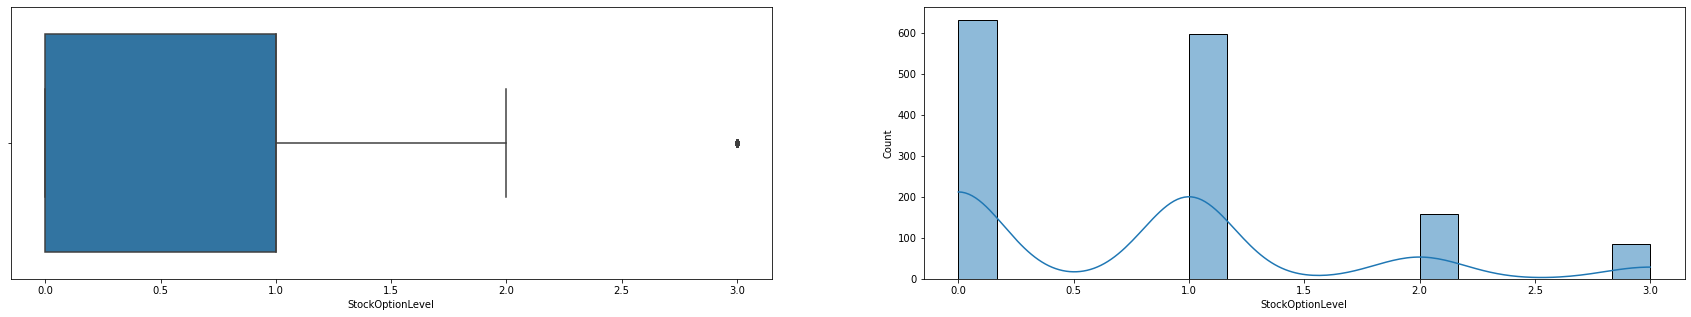


     
     
     
           
                                                          TotalWorkingYears


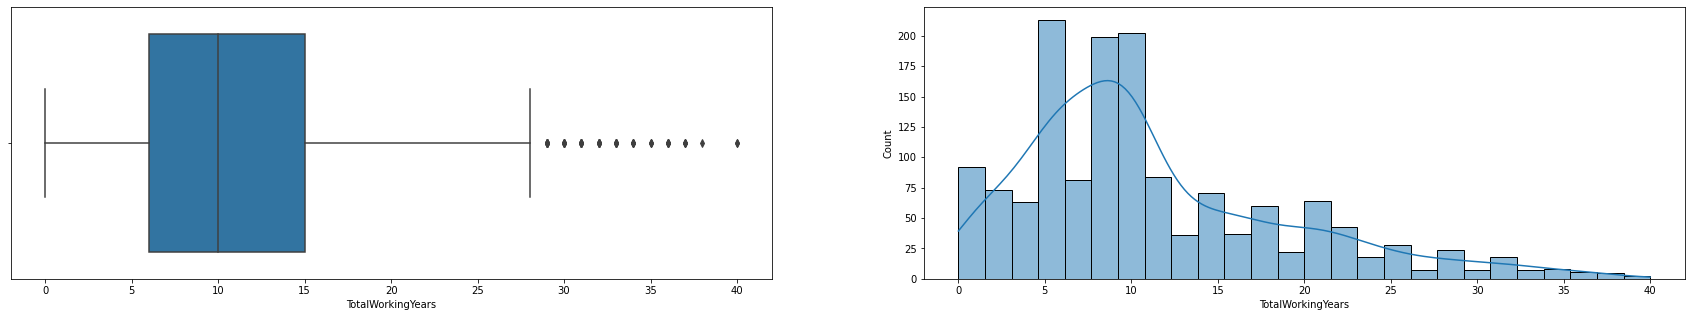


     
     
     
           
                                                          TrainingTimesLastYear


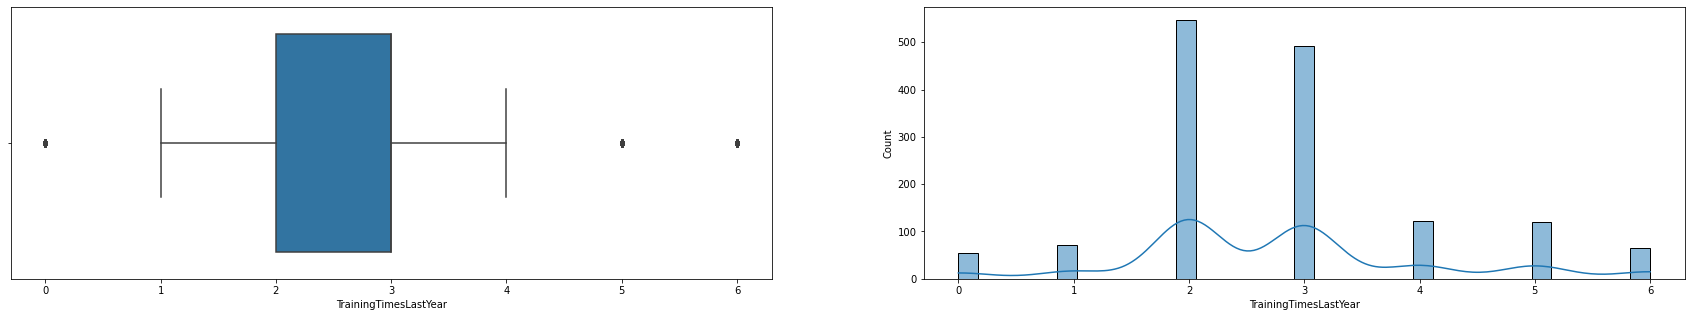


     
     
     
           
                                                          WorkLifeBalance


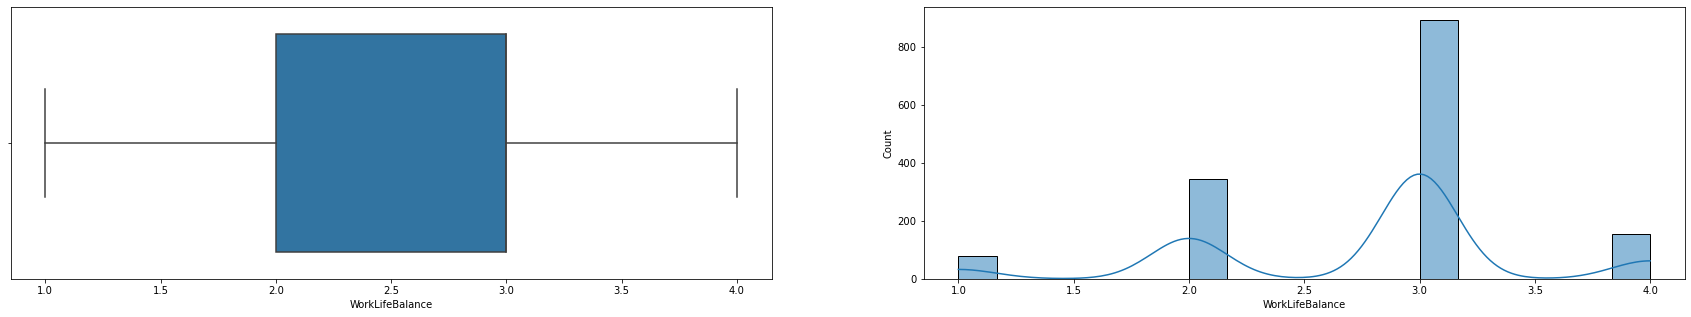


     
     
     
           
                                                          YearsAtCompany


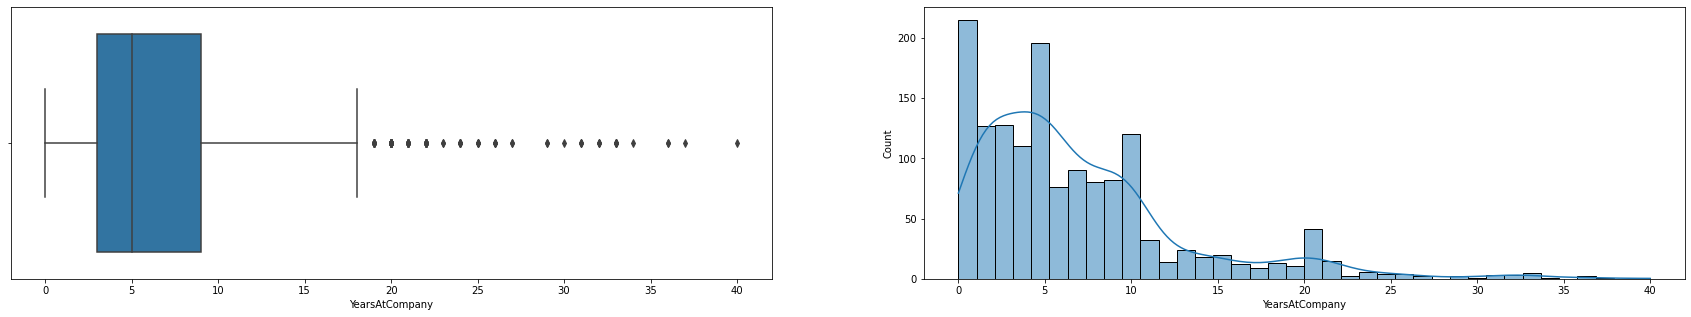


     
     
     
           
                                                          YearsInCurrentRole


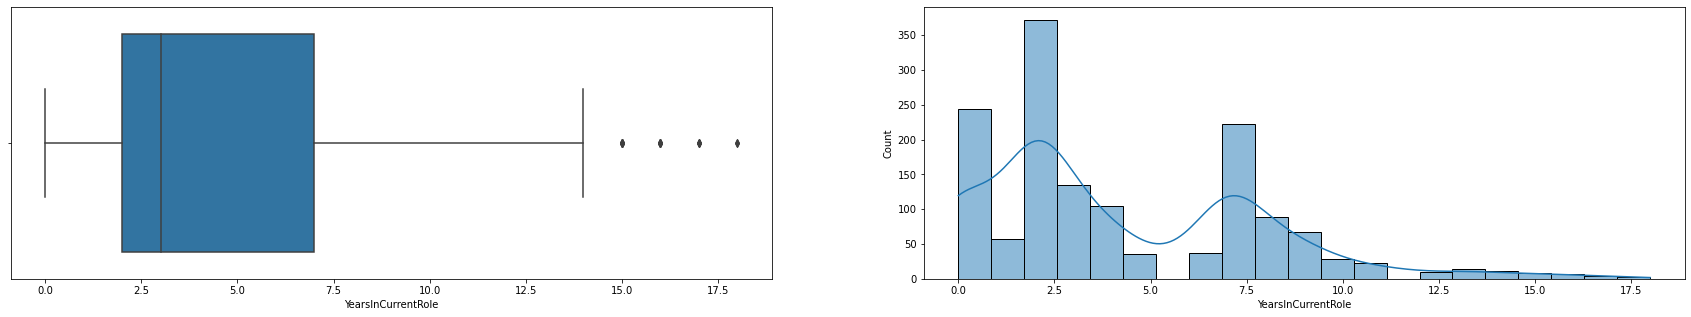


     
     
     
           
                                                          YearsSinceLastPromotion


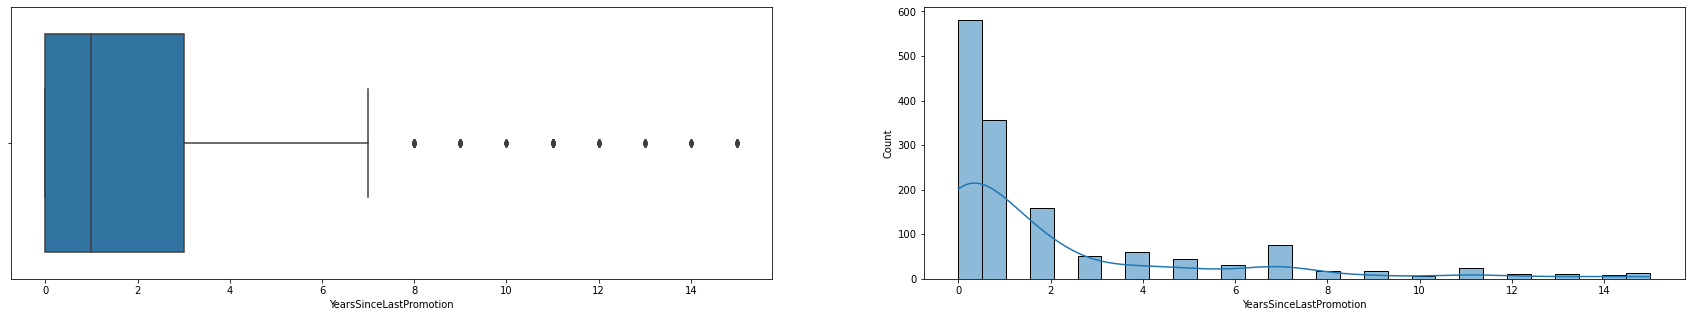


     
     
     
           
                                                          YearsWithCurrManager


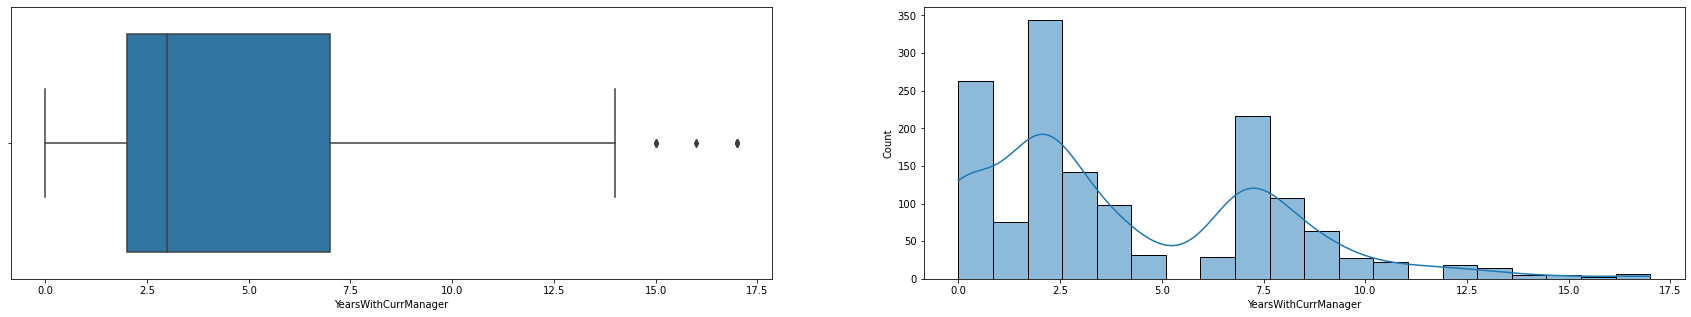

In [17]:
import warnings
warnings.simplefilter('ignore')
for i in num:   
    print(f"                                                          {i}")
    plotting(data,i)
    print('''
     
     
     
           ''')

In [18]:
data.nunique().sort_values()

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

<AxesSubplot:>

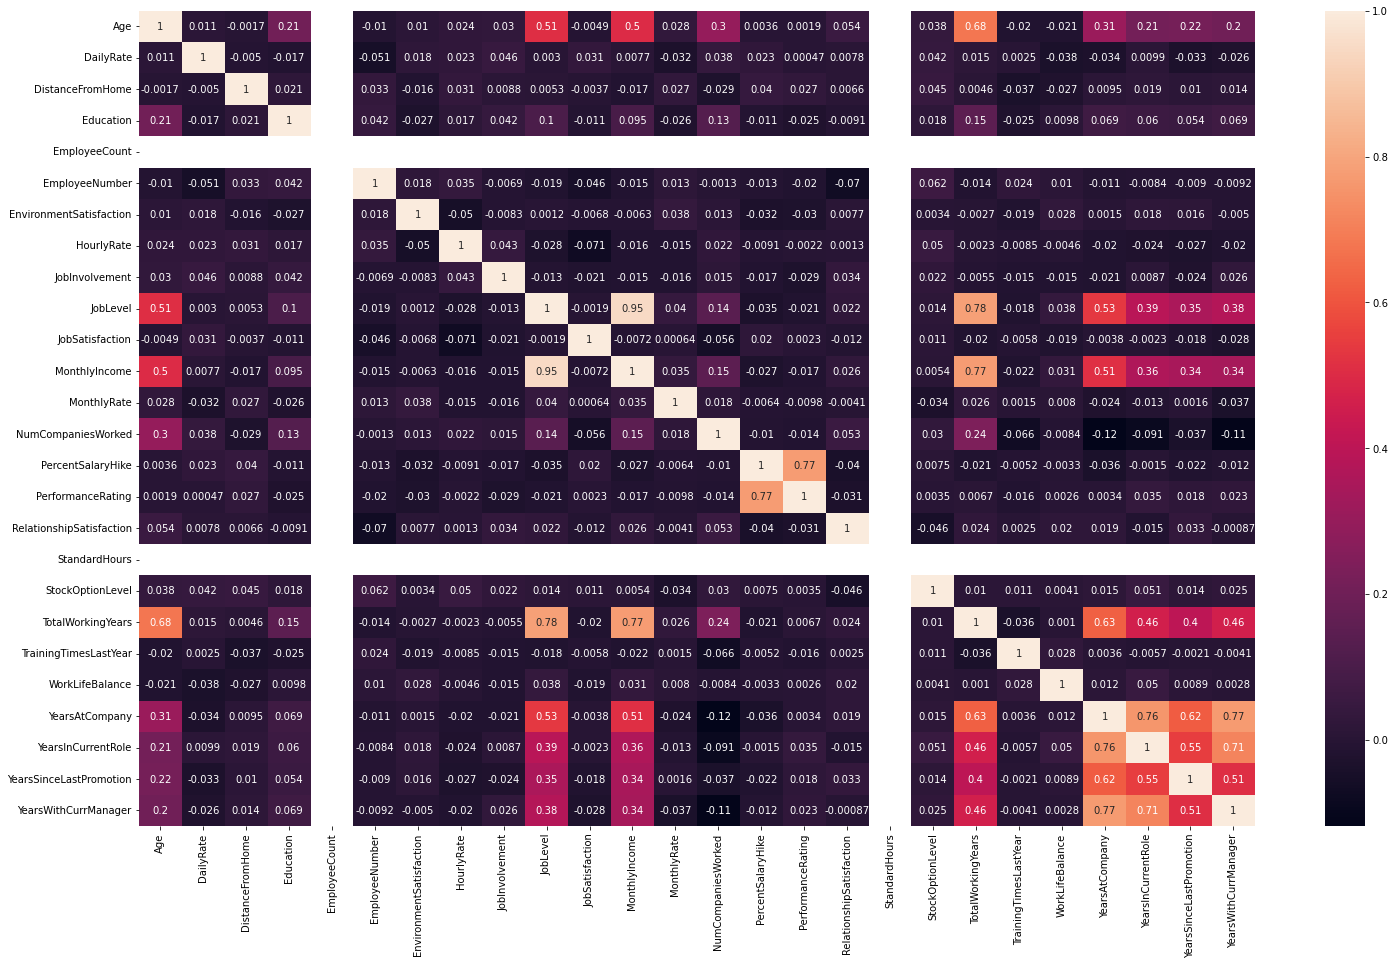

In [19]:
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(),annot=True)
#JobLevel, Education, MontlyIncome, NumCompaniesWorked, TotalWorkingYears, YearsCompany is connected with Age

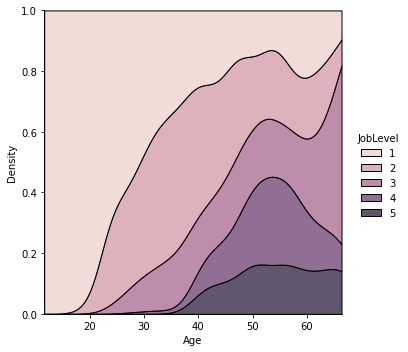

In [20]:
sns.displot(data,x='Age',hue='JobLevel',kind='kde',multiple='fill')
#senior jobs have older people and only few of the total employees

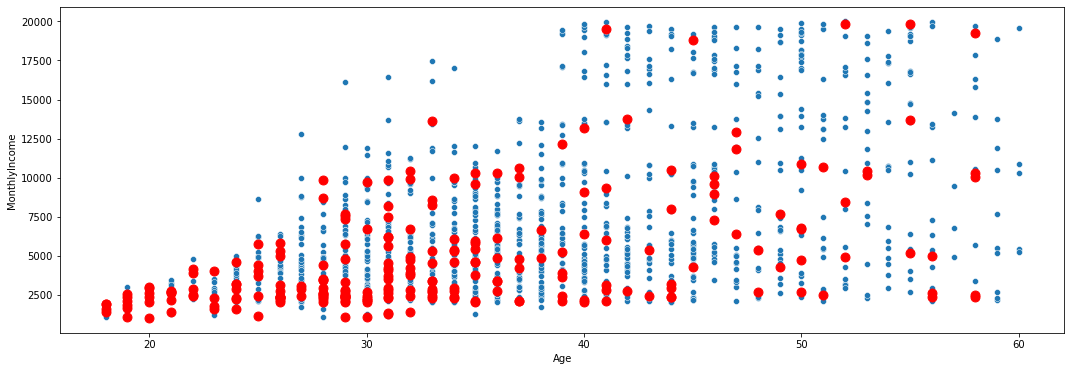

In [21]:
plt.figure(figsize=(18,6))
sns.scatterplot(data1[data1.Attrition==0].Age,data1[data1.Attrition==0].MonthlyIncome)
plt.scatter(data1[data1.Attrition==1].Age,data1[data1.Attrition==1].MonthlyIncome,marker='o',c='r',s=80)
#most of the ex-employees belongs to the class whose monthly income is low (below 7500)
#and they are young mostly less than 40 years

[]

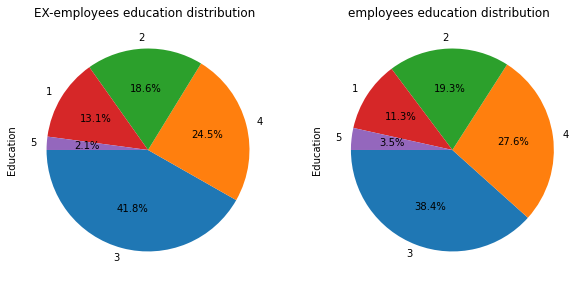

In [22]:
fig=plt.figure(figsize=(10,10))
fig.add_subplot(1,2,1)
data1[data1.Attrition==1]['Education'].value_counts().plot(kind='pie',autopct='%.1f%%',startangle=180)
plt.title('EX-employees education distribution  ')
plt.plot()
fig.add_subplot(1,2,2)
data1[data1.Attrition==0]['Education'].value_counts().plot(kind='pie',autopct='%.1f%%',startangle=180)
plt.title('employees education distribution  ')
plt.plot()
#no specific big impact of education on Attrition

<AxesSubplot:xlabel='JobRole', ylabel='count'>

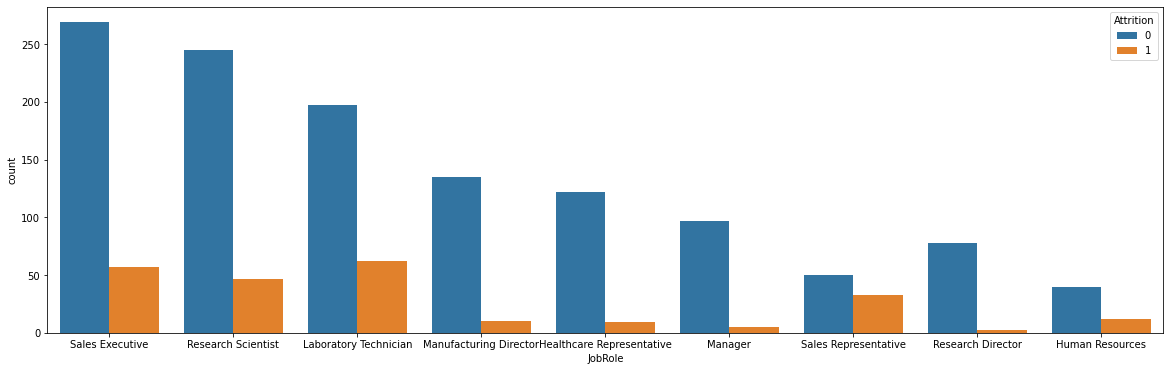

In [23]:
fig=plt.figure(figsize=(20,6))
sns.countplot(data1.JobRole,hue=data1.Attrition)

In [24]:
X=[]
for i in data1.JobRole.unique():
    val=data1[data1.JobRole==i]['Attrition'].value_counts()[1] / (data1[data1.JobRole==i]['Attrition'].value_counts()[0]
                                                               +data1[data1.JobRole==i]['Attrition'].value_counts()[1])
    print(f"for the Job role of {i} Attrition rate in {val}%")
    X.append(val)

for the Job role of Sales Executive Attrition rate in 0.17484662576687116%
for the Job role of Research Scientist Attrition rate in 0.16095890410958905%
for the Job role of Laboratory Technician Attrition rate in 0.23938223938223938%
for the Job role of Manufacturing Director Attrition rate in 0.06896551724137931%
for the Job role of Healthcare Representative Attrition rate in 0.06870229007633588%
for the Job role of Manager Attrition rate in 0.049019607843137254%
for the Job role of Sales Representative Attrition rate in 0.39759036144578314%
for the Job role of Research Director Attrition rate in 0.025%
for the Job role of Human Resources Attrition rate in 0.23076923076923078%


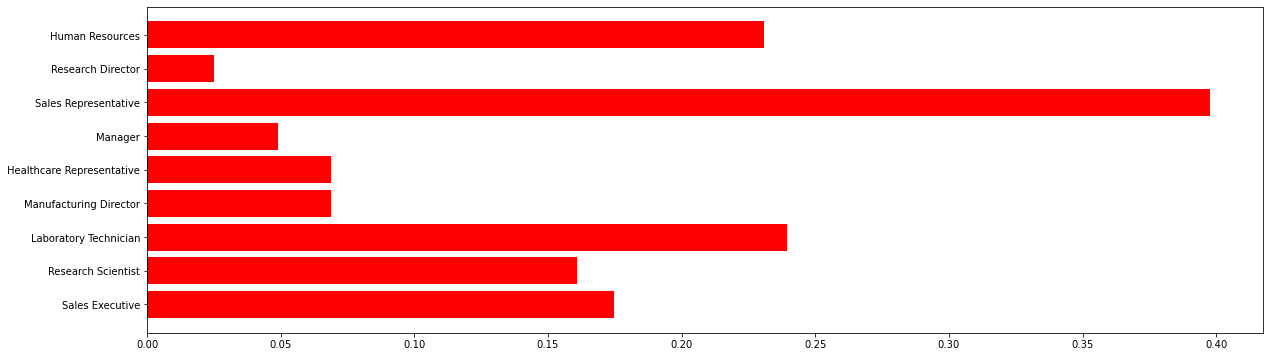

In [25]:
fig=plt.figure(figsize=(20,6))
plt.barh(data1.JobRole.unique(),X,color='r')
plt.show()
#from total employee of each job role the,maximum percentage of SALES REPRESENTATIVE are leaving the company

<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

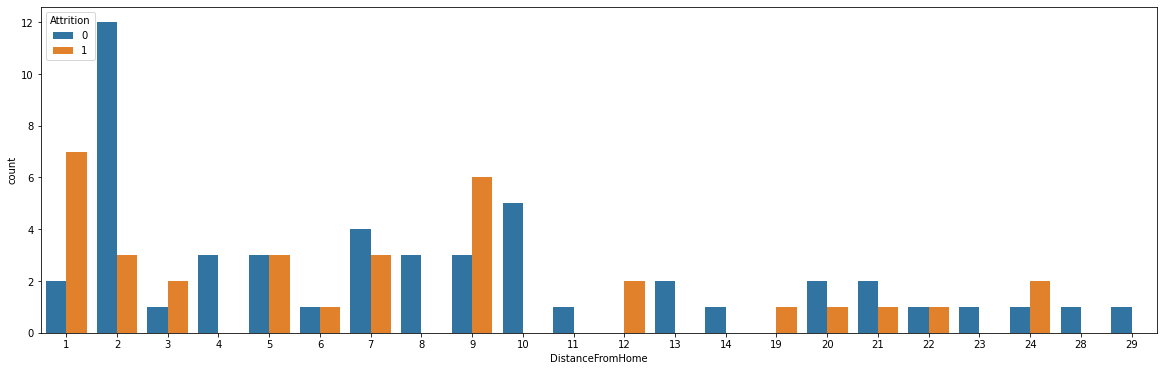

In [26]:
plt.figure(figsize=(20,6))
sns.countplot(data1[data1.JobRole=='Sales Representative'].DistanceFromHome,hue=data1.Attrition)

<AxesSubplot:xlabel='JobRole', ylabel='DistanceFromHome'>

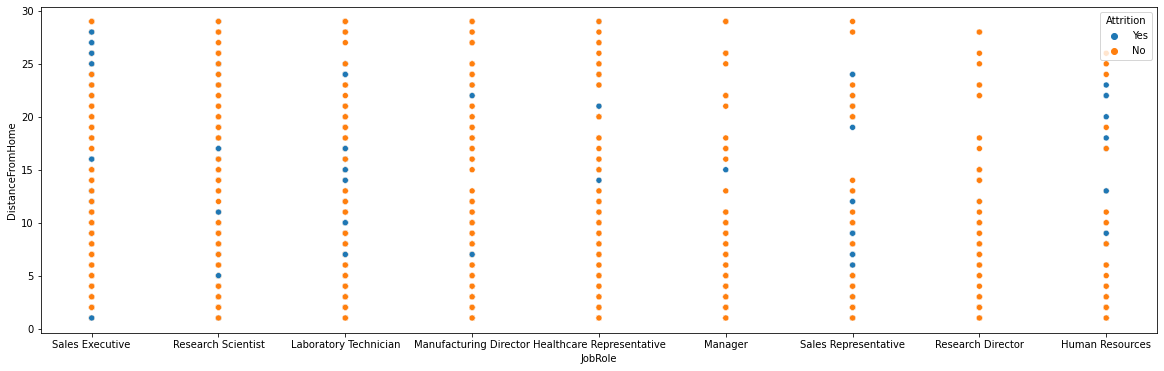

In [27]:
plt.figure(figsize=(20,6))
sns.scatterplot(data.JobRole,data.DistanceFromHome,hue=data.Attrition)

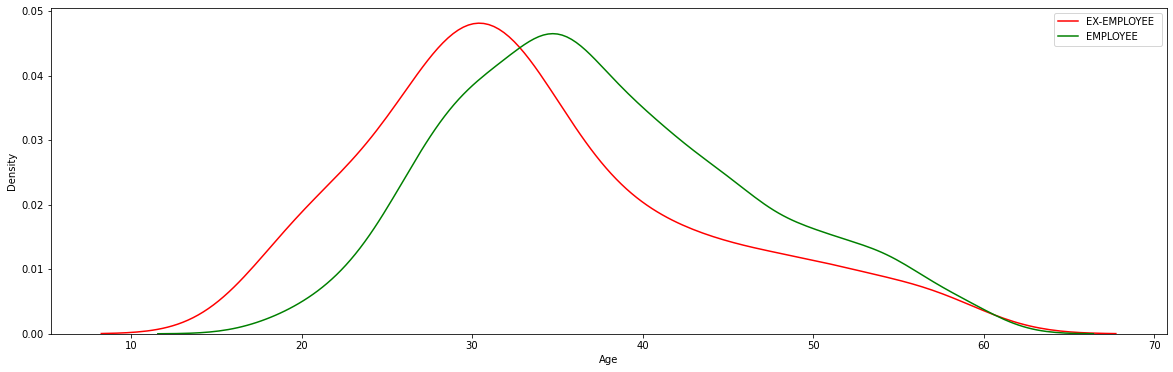

In [28]:
plt.figure(figsize=(20,6))
sns.kdeplot(data1[data1.Attrition==1].Age,label='EX-EMPLOYEE ',color='r')
sns.kdeplot(data1[data1.Attrition==0].Age,label='EMPLOYEE',c='g')
plt.legend()
#employees who are young are leaving the company

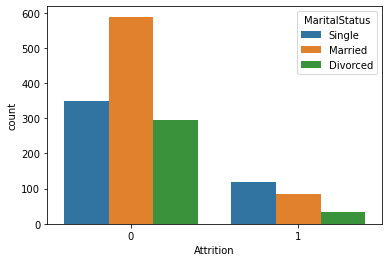

In [29]:
sns.countplot(data=data1,x='Attrition', hue= 'MaritalStatus')
plt.show()
#most of married employees are stick to company but most of single employee leave the ferm

array([<AxesSubplot:ylabel='None'>], dtype=object)

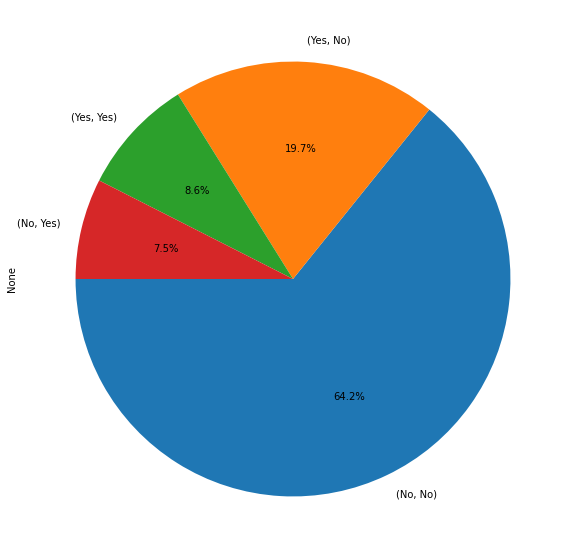

In [30]:
plt.figure(figsize=(10,10))
data[["OverTime","Attrition"]].value_counts().plot(kind="pie",subplots=True,autopct='%1.1f%%', startangle=180)
#attrition_no=(19.7+64.2)=83.9%
#attrition_yes=100-attrition_no=16.1%
#While 16.1% of the data is attrition, 8.6% of it experienced overtime. That means,(8.6/16.1)= 53.4% of ex-employees has an overtime issue. 
#On the other hand, %23.4 of the employees also has overtime in the job.

[]

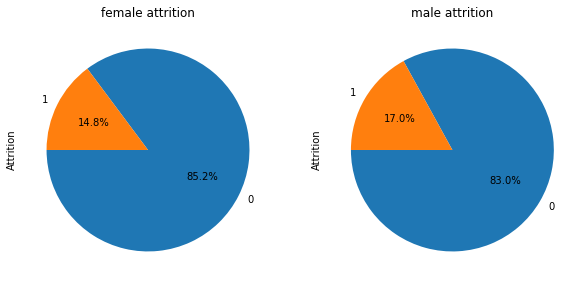

In [31]:
fig=plt.figure(figsize=(10,10))
fig.add_subplot(1,2,1)
data1[data1["Gender"]=="Female"]['Attrition'].value_counts().plot(kind='pie',autopct='%.1f%%',startangle=180)
plt.title('female attrition')
plt.plot()
fig.add_subplot(1,2,2)
data1[data1["Gender"]=="Male"]['Attrition'].value_counts().plot(kind='pie',autopct='%.1f%%',startangle=180)
plt.title('male attrition')
plt.plot()

In [32]:
from sklearn.base import BaseEstimator,TransformerMixin
               
class Convert(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X['Target'] = X['Attrition'].apply(lambda x: 0 if x == 'No' else 1)
        X.drop(['EmployeeCount', 'StandardHours', 'Over18', 'Attrition'], axis=1,inplace=True)
        cat = X.select_dtypes(include='object')
        col = [i for i in cat if X[i].nunique() < 20]
        return pd.get_dummies(X, columns=col, drop_first=True, dtype='int64')
        

In [33]:
data2 = Convert().fit_transform(data)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EmployeeNumber                     1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   JobSatisfaction                    1470 non-null   int64
 10  MonthlyIncome                      1470 non-null   int64
 11  MonthlyRate                        1470 non-null   int64
 12  NumCompaniesWorked  

In [34]:
target = data2["Target"]
data = data2.loc[:, data2.columns != 'Target']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=1, stratify=target)

In [36]:
data

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,2061,3,41,4,2,4,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1466,39,613,6,1,2062,4,42,2,3,1,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1467,27,155,4,3,2064,2,87,4,2,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
1468,49,1023,2,3,2065,4,63,2,2,2,5390,13243,2,14,3,4,0,17,3,2,9,6,0,8,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
RF=RandomForestClassifier()
LR=LogisticRegression()
SVM=SVC()
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [44]:
%%time
RF.fit(X_train,y_train)
RFPRED_TEST=RF.predict(X_test)
RFPRED_TRAIN=RF.predict(X_train)
RF_ACC_TEST=accuracy_score(y_test,RFPRED_TEST)
RF_ACC_TRAIN=accuracy_score(y_train,RFPRED_TRAIN)

print(RF_ACC_TEST,'            ',RF_ACC_TRAIN)

0.8641304347826086              1.0
CPU times: total: 188 ms
Wall time: 271 ms


In [45]:
%%time
LR.fit(X_train,y_train)
LRPRED_TEST=LR.predict(X_test)
LRPRED_TRAIN=LR.predict(X_train)
LR_ACC_TEST=accuracy_score(y_test,LRPRED_TEST)
LR_ACC_TRAIN=accuracy_score(y_train,LRPRED_TRAIN)

print(LR_ACC_TEST,'            ',LR_ACC_TRAIN)

0.8396739130434783              0.8393829401088929
CPU times: total: 62.5 ms
Wall time: 61.7 ms


In [46]:
%%time
SVM.fit(X_train,y_train)
SVMPRED_TEST=SVM.predict(X_test)
SVMPRED_TRAIN=SVM.predict(X_train)
SVM_ACC_TEST=accuracy_score(y_test,SVMPRED_TEST)
SVM_ACC_TRAIN=accuracy_score(y_train,SVMPRED_TRAIN)

print(SVM_ACC_TEST,'            ',SVM_ACC_TRAIN)

0.8396739130434783              0.838475499092559
CPU times: total: 109 ms
Wall time: 113 ms


In [47]:
from sklearn.model_selection import cross_val_predict,cross_val_score, train_test_split, learning_curve
RF_scores = cross_val_score(RF, X_train, y_train, cv=6, scoring = "accuracy")
LR_scores = cross_val_score(LR, X_train, y_train, cv=6, scoring = "accuracy")
SVM_scores = cross_val_score(SVM, X_train, y_train, cv=6, scoring = "accuracy")

RF_scores1 = cross_val_score(RF, X_test, y_test, cv=6, scoring = "accuracy")
LR_scores1 = cross_val_score(LR, X_test, y_test, cv=6, scoring = "accuracy")
SVM_scores1 = cross_val_score(SVM, X_test, y_test, cv=6, scoring = "accuracy")

Text(0, 0.5, 'accuracy score')

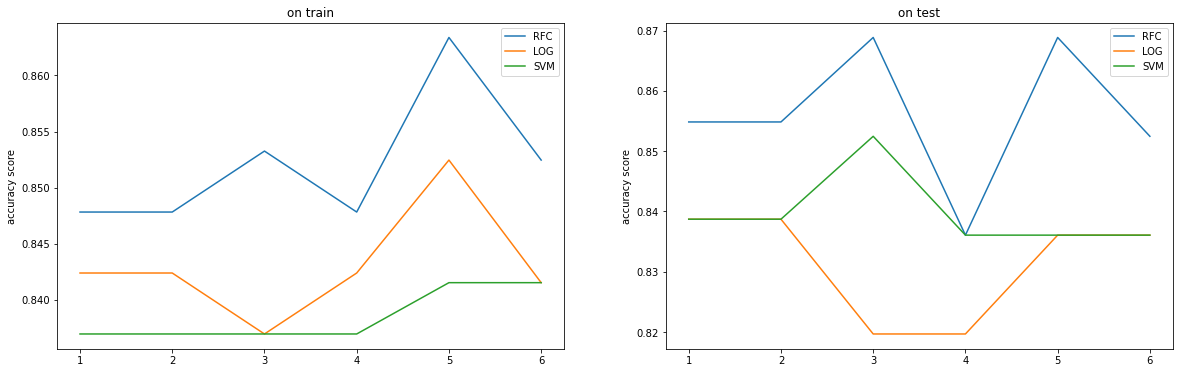

In [48]:
y = [1, 2, 3, 4, 5,6]
fig=plt.figure(figsize=(20,6))
fig.add_subplot(1,2,1)
plt.plot(y,RF_scores, label = "RFC")
plt.plot(y,LR_scores, label = "LOG")
plt.plot(y,SVM_scores, label = "SVM")
plt.legend()
plt.title('on train')
plt.ylabel('accuracy score')
fig.add_subplot(1,2,2)
plt.plot(y,RF_scores1, label = "RFC")
plt.plot(y,LR_scores1, label = "LOG")
plt.plot(y,SVM_scores1, label = "SVM")
plt.legend()
plt.title('on test')
plt.ylabel('accuracy score')
#RF is overfitting but for others, there is no overfit or underfit problem.

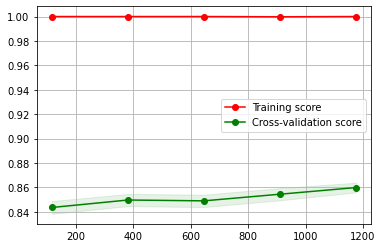

In [49]:

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(RF,data,target,scoring='accuracy',cv=5,n_jobs=5,return_times=True,)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot learning curve
plt.grid()
plt.fill_between(train_sizes,train_scores_mean - train_scores_std,train_scores_mean + train_scores_std,alpha=0.1,color="r",)
plt.fill_between(train_sizes,test_scores_mean - test_scores_std,test_scores_mean + test_scores_std,alpha=0.1,color="g",)
plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
plt.legend(loc="best")


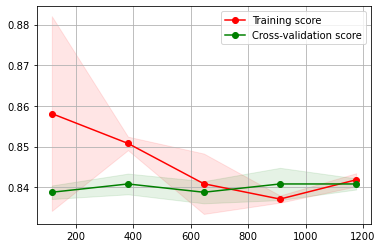

In [50]:
from sklearn.model_selection import cross_val_predict,cross_val_score, train_test_split, learning_curve
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(LR,data,target,scoring='accuracy',cv=5,n_jobs=5,return_times=True,)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot learning curve
plt.grid()
plt.fill_between(train_sizes,train_scores_mean - train_scores_std,train_scores_mean + train_scores_std,alpha=0.1,color="r",)
plt.fill_between(train_sizes,test_scores_mean - test_scores_std,test_scores_mean + test_scores_std,alpha=0.1,color="g",)
plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
plt.legend(loc="best")

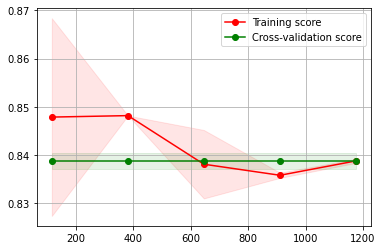

In [51]:
from sklearn.model_selection import cross_val_predict,cross_val_score, train_test_split, learning_curve
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(SVM,data,target,scoring='accuracy',cv=5,n_jobs=5,return_times=True,)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot learning curve
plt.grid()
plt.fill_between(train_sizes,train_scores_mean - train_scores_std,train_scores_mean + train_scores_std,alpha=0.1,color="r",)
plt.fill_between(train_sizes,test_scores_mean - test_scores_std,test_scores_mean + test_scores_std,alpha=0.1,color="g",)
plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
plt.legend(loc="best")

In [69]:
from sklearn.preprocessing import StandardScaler
STD=StandardScaler()
X_train=STD.fit_transform(X_train)
X_test=STD.transform(X_test)

In [70]:
from imblearn.over_sampling import SMOTE
SMT=SMOTE(random_state=2)
X_train,y_train=SMT.fit_resample(X_train,y_train.ravel())

In [71]:

from sklearn.model_selection import StratifiedKFold,GridSearchCV
K=StratifiedKFold(n_splits=10)
params={'penalty':('l1', 'l2', 'elasticnet'),
        'max_iter':(100,500),
        'C':(1,3,5,7)
}
from sklearn.model_selection import GridSearchCV
gmodel=GridSearchCV(LR,param_grid=params,cv=K)

In [72]:
gmodel.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': (1, 3, 5, 7), 'max_iter': (100, 500),
                         'penalty': ('l1', 'l2', 'elasticnet')})

In [73]:
X_train.shape

(1848, 45)

In [74]:
X_test.shape

(368, 45)

In [75]:
pred=gmodel.predict(X_test)

In [76]:
pred1=gmodel.predict(X_train)

In [77]:
confusion_matrix(y_test,pred)

array([[221,  88],
       [ 16,  43]], dtype=int64)

In [78]:
confusion_matrix(y_train,pred1)

array([[717, 207],
       [145, 779]], dtype=int64)

In [79]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81       309
           1       0.33      0.73      0.45        59

    accuracy                           0.72       368
   macro avg       0.63      0.72      0.63       368
weighted avg       0.84      0.72      0.75       368



In [80]:
print(classification_report(y_train,pred1))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       924
           1       0.79      0.84      0.82       924

    accuracy                           0.81      1848
   macro avg       0.81      0.81      0.81      1848
weighted avg       0.81      0.81      0.81      1848



In [88]:
import pickle
pickle.dump(gmodel,open('ibm.pkl','wb'))

In [92]:
model=pickle.load(open('ibm.pkl','rb'))